## Bike Sharing Assignment

Problem Statement: A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end.

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [172]:
Bike_sharing = pd.read_csv(r'C:\Users\rashia\Desktop\LR Assignment\day.csv')


### Step 1: Reading and Understanding data

In [173]:
Bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [174]:
Bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [175]:
Bike_sharing.shape

(730, 16)

In [176]:
Bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [177]:
## Dropping unncessary columns

##temp and atemp would be highly correlated, hence choosing one

Bike_sharing=Bike_sharing.drop(['instant','dteday','casual','registered','atemp'], axis=1)

In [178]:
Bike_sharing.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,48.2917,14.958889,1321


In [179]:
Bike_sharing.shape

(730, 11)

    Season: categorical
	Year: Binary
	Month: categorical
	Holiday: 0: No, 1:yes
	Weekday: 0: Sunday, 6: Saturday, 1: Monday
	Working day: Binary, categorical
	Weathersit: Categorical
    Humidity: Continuous variable
    Wind speed: Continuous

In [180]:
## Changing the necessary datatype of categorical variables: Season,mnth,weekday,weathersit
Bike_sharing['season']=Bike_sharing['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [181]:
import calendar
Bike_sharing['mnth'] = Bike_sharing['mnth'].apply(lambda x: calendar.month_abbr[x])

In [182]:
Bike_sharing['weekday']=Bike_sharing['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [183]:
Bike_sharing['weathersit']=Bike_sharing['weathersit'].map({1:'Clear',2:'Mist+Cloudy',3:'Light Snow+Rain',4:'Heavy Rain'})

In [184]:
Bike_sharing.head(36)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist+Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist+Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600
5,spring,0,Jan,0,Thursday,1,Clear,8.378268,51.8261,6.000868,1606
6,spring,0,Jan,0,Friday,1,Mist+Cloudy,8.057402,49.8696,11.304642,1510
7,spring,0,Jan,0,Saturday,0,Mist+Cloudy,6.765000,53.5833,17.875868,959
8,spring,0,Jan,0,Sunday,0,Clear,5.671653,43.4167,24.250650,822
9,spring,0,Jan,0,Monday,1,Clear,6.184153,48.2917,14.958889,1321


In [185]:
Bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


#### Data Visualisation

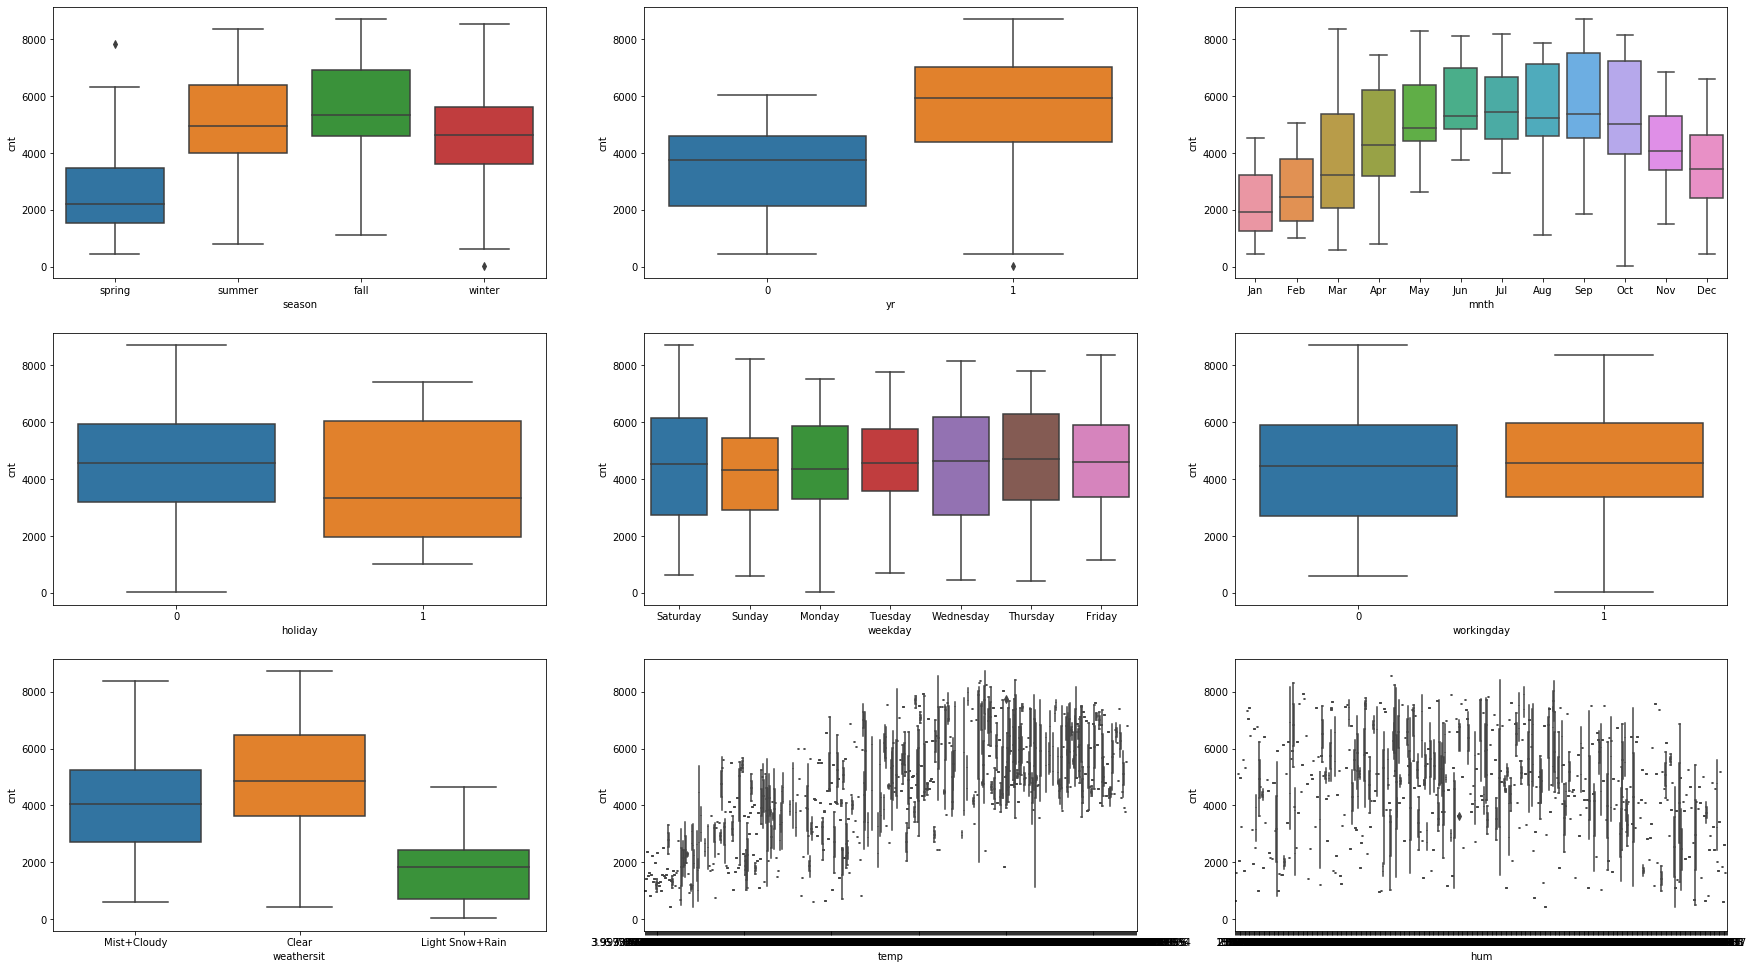

In [186]:
## Visualising categorical variables
plt.figure(figsize=(30, 17))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike_sharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = Bike_sharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data =Bike_sharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike_sharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_sharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike_sharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike_sharing)
plt.subplot(3,3,8)
sns.boxplot(x = 'temp', y = 'cnt', data = Bike_sharing)
plt.subplot(3,3,9)
sns.boxplot(x = 'hum', y = 'cnt', data = Bike_sharing)
plt.show()

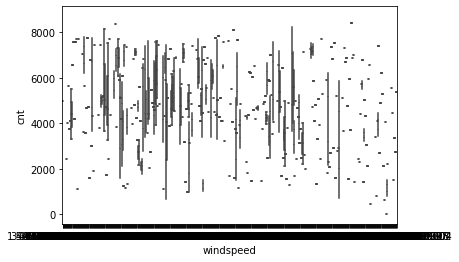

In [187]:
sns.boxplot(x = 'windspeed', y = 'cnt', data = Bike_sharing)
plt.show()

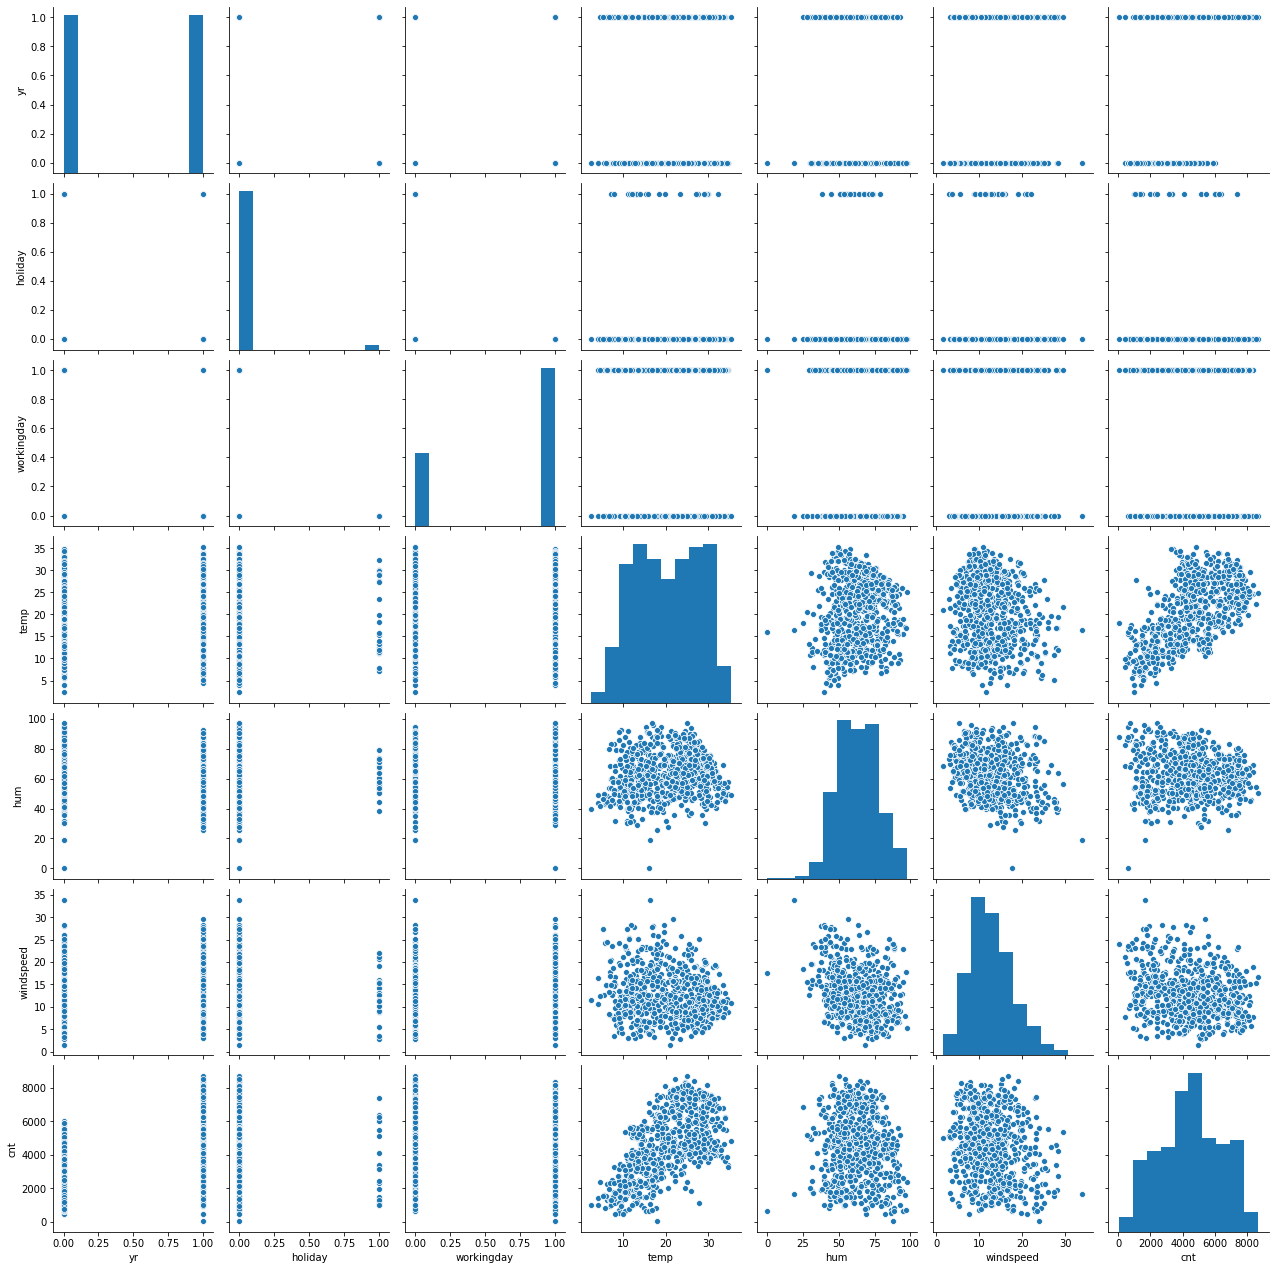

In [188]:
sns.pairplot(Bike_sharing)
plt.show()

#### Checking the correlation between variables

In [189]:
Bike_sharing.corr()

,yr,holiday,workingday,temp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.128565,-0.158186,0.627044
hum,-0.112547,-0.015662,0.023202,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,-0.098543,-0.235132,1.000000


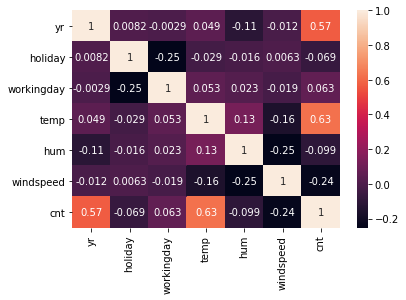

In [190]:
sns.heatmap(Bike_sharing.corr(), annot=True)

### Step 2: Data Preparation

#### Creating dummy variables for all the categorical columns : Season,mnth,weekday,weathersit

In [191]:
season_1=pd.get_dummies(Bike_sharing['season'],drop_first=True) 

In [192]:
month=pd.get_dummies(Bike_sharing['mnth'],drop_first=True) 

In [193]:
weekday_1=pd.get_dummies(Bike_sharing['weekday'],drop_first=True) 

In [194]:
weathersit_1=pd.get_dummies(Bike_sharing['weathersit'],drop_first=True) 

In [195]:
##Concatinating dummy variables to actual dataframe

Bike_sharing=pd.concat([Bike_sharing,season_1,month,weekday_1,weathersit_1],axis=1)

In [196]:
Bike_sharing.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow+Rain,Mist+Cloudy
0,spring,0,Jan,0,Saturday,0,Mist+Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sunday,0,Mist+Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0
5,spring,0,Jan,0,Thursday,1,Clear,8.378268,51.8261,6.000868,...,0,0,0,0,0,1,0,0,0,0
6,spring,0,Jan,0,Friday,1,Mist+Cloudy,8.057402,49.8696,11.304642,...,0,0,0,0,0,0,0,0,0,1
7,spring,0,Jan,0,Saturday,0,Mist+Cloudy,6.765000,53.5833,17.875868,...,0,0,0,1,0,0,0,0,0,1
8,spring,0,Jan,0,Sunday,0,Clear,5.671653,43.4167,24.250650,...,0,0,0,0,1,0,0,0,0,0
9,spring,0,Jan,0,Monday,1,Clear,6.184153,48.2917,14.958889,...,0,0,1,0,0,0,0,0,0,0


In [197]:
## Dropping the original columns present in dataframe

Bike_sharing=Bike_sharing.drop(['season','mnth','weekday','weathersit'],axis=1)

In [198]:
Bike_sharing.head(20)

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow+Rain,Mist+Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,8.378268,51.8261,6.000868,1606,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,1,8.057402,49.8696,11.304642,1510,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,6.765000,53.5833,17.875868,959,1,0,0,...,0,0,0,1,0,0,0,0,0,1
8,0,0,0,5.671653,43.4167,24.250650,822,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [199]:
Bike_sharing.shape

(730, 29)

In [200]:
Bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   hum              730 non-null    float64
 5   windspeed        730 non-null    float64
 6   cnt              730 non-null    int64  
 7   spring           730 non-null    uint8  
 8   summer           730 non-null    uint8  
 9   winter           730 non-null    uint8  
 10  Aug              730 non-null    uint8  
 11  Dec              730 non-null    uint8  
 12  Feb              730 non-null    uint8  
 13  Jan              730 non-null    uint8  
 14  Jul              730 non-null    uint8  
 15  Jun              730 non-null    uint8  
 16  Mar              730 non-null    uint8  
 17  May             

#### Splitting the data into train and test datasets

In [201]:
import sklearn
from sklearn.model_selection import train_test_split

In [202]:
df_train, df_test = train_test_split(Bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


#### Performing Scaling

In [203]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [204]:
scaler = MinMaxScaler()
num_vars = ['temp', 'hum', 'windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow+Rain,Mist+Cloudy
653,1,0,1,0.509887,0.575354,0.300794,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1


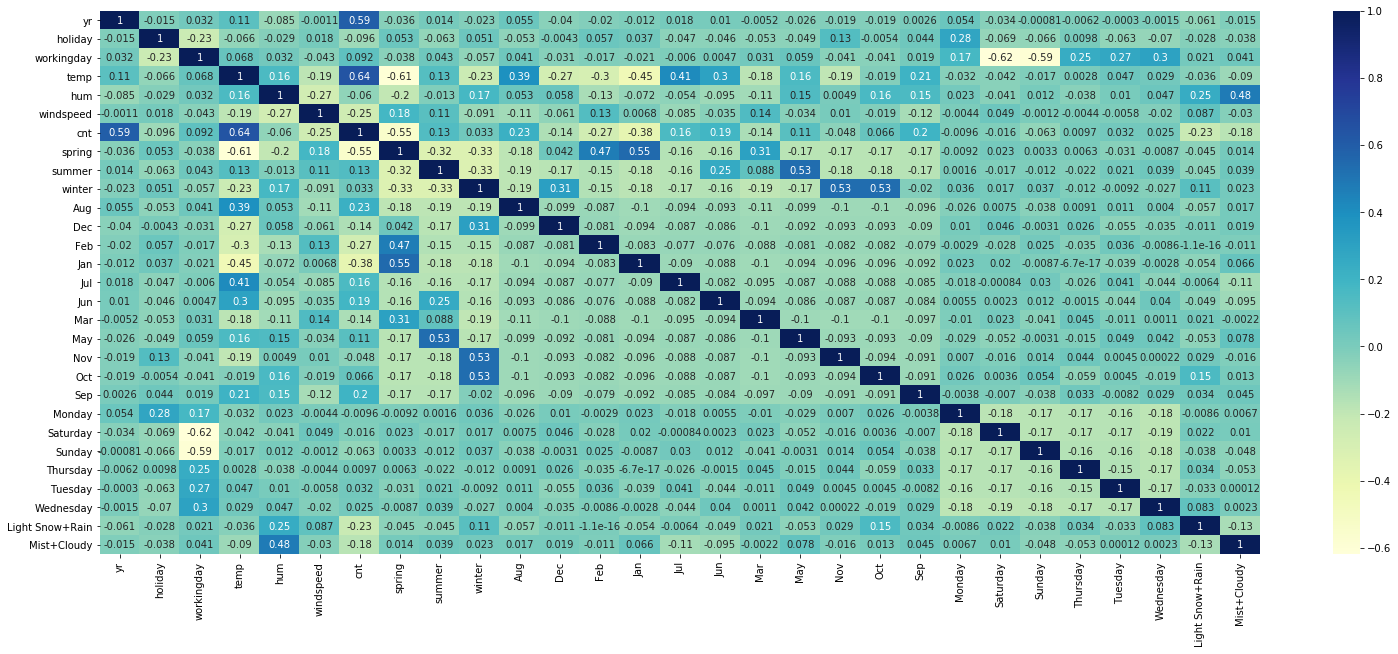

In [205]:
## Training the model

plt.figure(figsize = (26, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Dividing the data into X and Y

In [206]:
y_train=df_train.pop('cnt')
X_train=df_train

In [207]:
y_train.head(20)

653    7534
576    7216
426    4066
728    1796
482    4220
111    1683
580    6824
500    7424
479    6196
472    4367
455    6041
636    8555
224    4150
458    6436
244    4727
627    7720
595    4549
140    5805
454    6235
162    4460
Name: cnt, dtype: int64

In [208]:
X_train.head(20)

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow+Rain,Mist+Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
580,1,0,0,0.914852,0.632030,0.462538,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
500,1,0,1,0.719639,0.719193,0.172431,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
479,1,0,1,0.520271,0.440962,0.164434,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
472,1,0,1,0.503656,0.586518,0.270032,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


### Step 3: Data Modelling and Evaluation

In [209]:
import statsmodels
import statsmodels.api as sm

In [210]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#### Creating model using Mixed Approach

In [211]:
## Using RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [212]:
## listing variables which are seslected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 6),
 ('Thursday', False, 11),
 ('Tuesday', False, 9),
 ('Wednesday', False, 12),
 ('Light Snow+Rain', True, 1),
 ('Mist+Cloudy', True, 1)]

In [213]:
## describing top 15 columns

colmn = X_train.columns[rfe.support_]
colmn

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Jul', 'Sep', 'Saturday', 'Light Snow+Rain',
       'Mist+Cloudy'],
      dtype='object')

In [214]:
## The other 5 varables

X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Monday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [215]:
## Building model using stats model with RFE selected columns
X_train_rfe = X_train[colmn]

In [216]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [217]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [218]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          2.31e-191
Time:                        21:39:02   Log-Likelihood:                -4105.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2204.0556    314.032     

`Jan` is insignificant in presence of other variables; can be dropped

In [219]:
X_train_new = X_train_rfe.drop(["Jan"], axis = 1)

In [220]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Jul', 'Sep', 'Saturday',
       'Light Snow+Rain', 'Mist+Cloudy'],
      dtype='object')

In [221]:
## Rebuilding a new model
X_train_lm =X_train_new

In [222]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [223]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.13e-191
Time:                        21:39:02   Log-Likelihood:                -4107.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8309.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2102.6839    310.741     

In [224]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Jul', 'Sep', 'Saturday',
       'Light Snow+Rain', 'Mist+Cloudy'],
      dtype='object')

In [225]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [226]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.49
3,temp,16.97
2,workingday,5.28
5,windspeed,4.72
6,spring,4.24
8,winter,3.44
7,summer,2.83
13,Mist+Cloudy,2.28
0,yr,2.08
11,Saturday,1.97


`holiday` is insignificant in presence of other variables; can be dropped

In [227]:
X_train_new_1 = X_train_new.drop(["holiday"], axis = 1)

In [228]:
X_train_new_1.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Jul', 'Sep', 'Saturday', 'Light Snow+Rain', 'Mist+Cloudy'],
      dtype='object')

In [229]:
## Rebuilding the new model
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_1)

In [230]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  

In [231]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          8.51e-192
Time:                        21:39:02   Log-Likelihood:                -4110.4
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     496   BIC:                             8308.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2019.5931    309.648     

`spring` is insignificant in presence of other variables; can be dropped

In [232]:
X_train_new_2 = X_train_new_1.drop(["spring"], axis = 1)
X_train_new_2.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'summer', 'winter',
       'Jul', 'Sep', 'Saturday', 'Light Snow+Rain', 'Mist+Cloudy'],
      dtype='object')

In [233]:
## Rebuilding the new model
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_2)

In [234]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  

In [235]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          2.26e-191
Time:                        21:39:02   Log-Likelihood:                -4114.2
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     497   BIC:                             8310.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1504.2480    247.394     

`Jul` is insignificant in presence of other variables; can be dropped

In [236]:
X_train_new_3 = X_train_new_2.drop(["Jul"], axis = 1)
X_train_new_3.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'summer', 'winter',
       'Sep', 'Saturday', 'Light Snow+Rain', 'Mist+Cloudy'],
      dtype='object')

In [237]:
## Rebuilding the new model
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_3)

In [238]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  

In [239]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          2.89e-191
Time:                        21:39:02   Log-Likelihood:                -4117.3
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     498   BIC:                             8309.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1498.0851    248.641     

In [240]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.98
2,temp,8.12
1,workingday,4.53
4,windspeed,3.73
10,Mist+Cloudy,2.10
0,yr,2.02
8,Saturday,1.79
6,winter,1.66
5,summer,1.58
7,Sep,1.20


`hum` has very high VIF in presence of other variables; can be dropped

In [241]:
X_train_new_4 = X_train_new_3.drop(["hum"], axis = 1)
X_train_new_4.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'summer', 'winter', 'Sep',
       'Saturday', 'Light Snow+Rain', 'Mist+Cloudy'],
      dtype='object')

In [242]:
## Rebuilding the new model
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_4)

In [243]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  

In [244]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.47e-188
Time:                        21:39:03   Log-Likelihood:                -4126.6
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     499   BIC:                             8322.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             676.7252    161.635     

In [245]:
# Calculate the VIFs for the final model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,Saturday,1.69
4,summer,1.57
9,Mist+Cloudy,1.53
5,winter,1.40
6,Sep,1.20
8,Light Snow+Rain,1.08


##### In the final model, we have 10 variables, with R-squared = 83.6 and Adj. R-squared=83.2

#### Checking the various assumptions: Residual Analysis

In [246]:
y_train_cnt = lm.predict(X_train_lm)

In [247]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

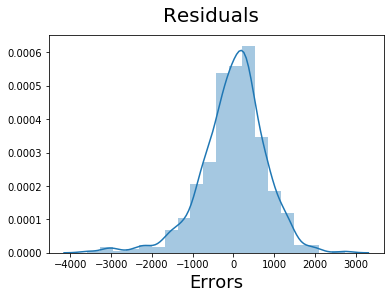

In [248]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Residuals', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Checking the Adj. R-square for both test and test variables

In [249]:
## Applying scaling on the test data
num_vars = ['temp', 'hum', 'windspeed']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow+Rain,Mist+Cloudy
184,0,1,0,0.831783,0.657364,0.084219,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [250]:
## Dividing into Test and Train datasets
y_test = df_test.pop('cnt')
X_test = df_test

In [251]:
## Now let's use our model to make predictions.

## Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new_4.columns]

## Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [252]:
X_test_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'summer', 'winter',
       'Sep', 'Saturday', 'Light Snow+Rain', 'Mist+Cloudy'],
      dtype='object')

In [253]:
## Making predictions
y_test_pred = lm.predict(X_test_new)

In [254]:
## Model Evaluation

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2_square=r2_score(y_true=y_test, y_pred=y_test_pred)
r2_square

0.7955844377237247

In [255]:
r2_square_train=r2_score(y_true=y_train, y_pred=y_train_cnt)
r2_square_train

0.8357769866151916

#### Reporting the final model

Text(0, 0.5, 'y_test_pred')

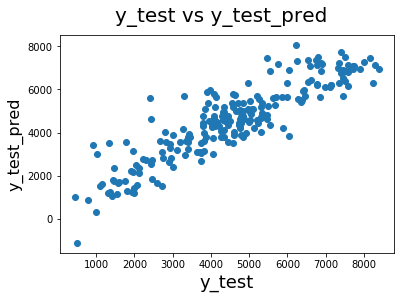

In [256]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)          
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_test_pred', fontsize=16)                          

#### Recommendations to the company


>>Which variables are significant in predicting the demand for shared bikes?

The variables which play an important role in demand graph are temperature, whether it is a working day or not.
Temperature also plays a vital role in determining the demand for bikes.

We can also tell when there are weather conditions like snow, rain, the demand goes low

During the holiday and during weekends the demand is high as compared to other days.